In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
import matplotlib
sns.set_palette('colorblind',10)
sns.set_context('notebook')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=20) 
from astropy.table import Table
import os
__outdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/Output/'
__datdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/data/KepxDR2/'

In [6]:
def read_data():
    '''Reads in the Yu et al. 2018 data'''
    sfile = __datdir__+'rcxyu18.csv'
    df = pd.read_csv(sfile)
    return df

def read_paramdict(majorlabel, minorlabel='', sort='astero'):
    '''Reads in results for either:
        -A full run series (majorlabel) where the minorlabel is included as a
            column in the output.
        -A single run (majorlabel and minorlabel).

        Returns a pandas dataframe.
    '''
    loc = __outdir__+majorlabel+'/'

    if minorlabel != '':
        globlist = glob.glob(loc+sort+'_'+str(float(minorlabel))+'_*pars*.csv')
    else:
        globlist = glob.glob(loc+sort+'*_*pars*.csv')

    minorlabels = [os.path.basename(globloc).split('_')[1] for globloc in globlist]
    if sort == 'gaia':
        ccdlabels = [os.path.basename(globloc).split('_')[-2] for globloc in globlist]
        
    df = pd.DataFrame()
    for n, globloc in enumerate(globlist):
        sdf = pd.read_csv(globloc, index_col = 0)
        sdf[majorlabel] = minorlabels[n]
        sdf['ccdlabel'] = ccdlabels[n]
        df = df.append(sdf)
    df['ccdlabel'] = df.ccdlabel.astype(int)
    return df.sort_values(by='ccdlabel')

In [7]:
df = read_data()

In [8]:
gr = read_paramdict('Expired_runs/Gaia_K_tempscale_Clump',minorlabel='-50.0',sort='gaia')

In [18]:
df['oo_zp'] = np.ones(len(df))
df['L'] = np.ones(len(df))
for ccd in gr.ccdlabel.values:
    df['oo_zp'][df.ccd == ccd] *= gr[gr.ccdlabel == ccd].oo_zp.values[0]
    df['L'][df.ccd == ccd] *= gr[gr.ccdlabel == ccd].L.values[0]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


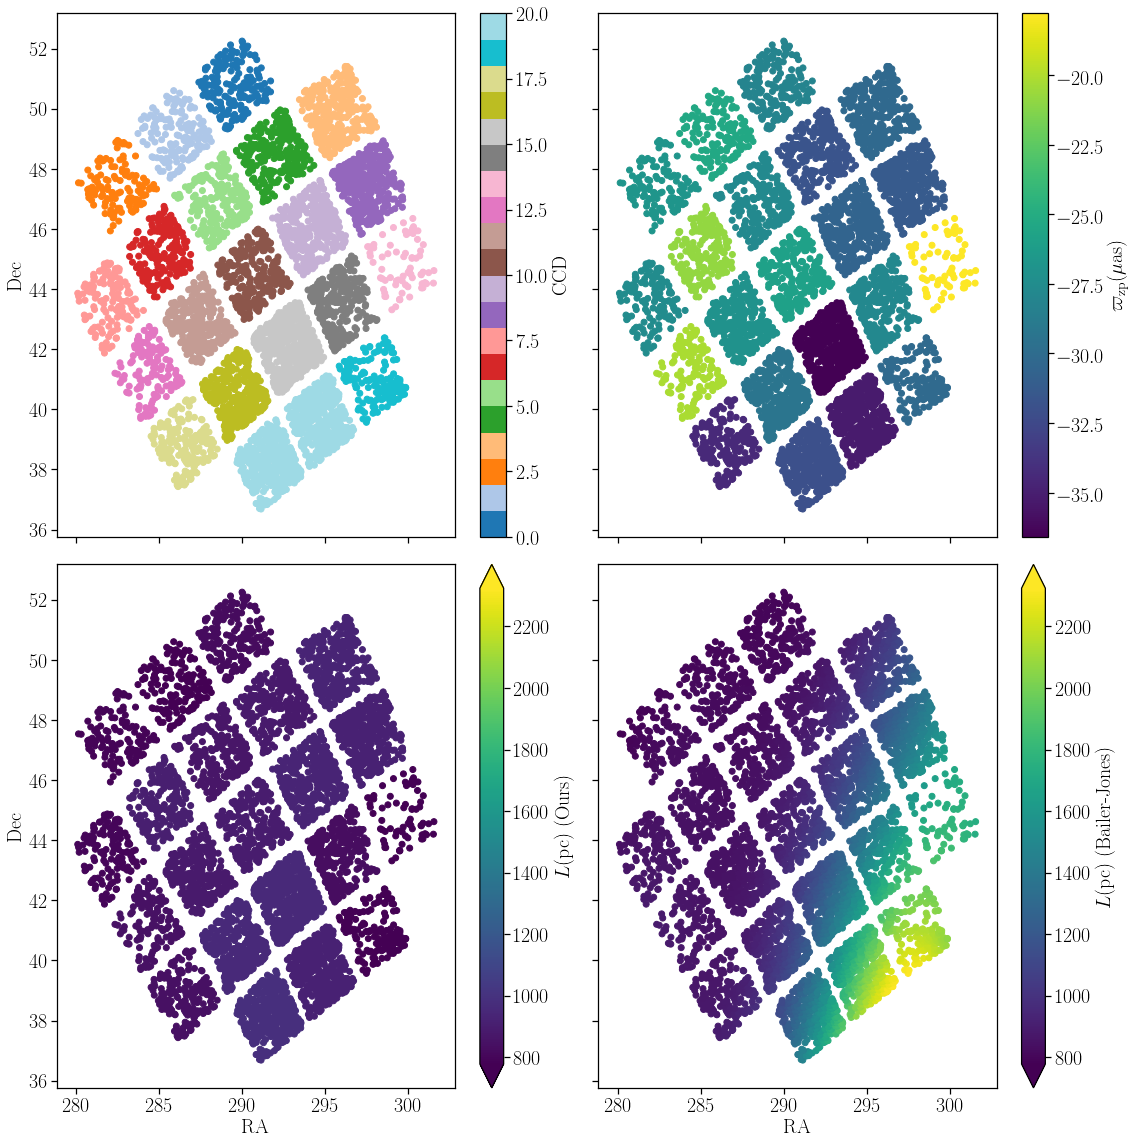

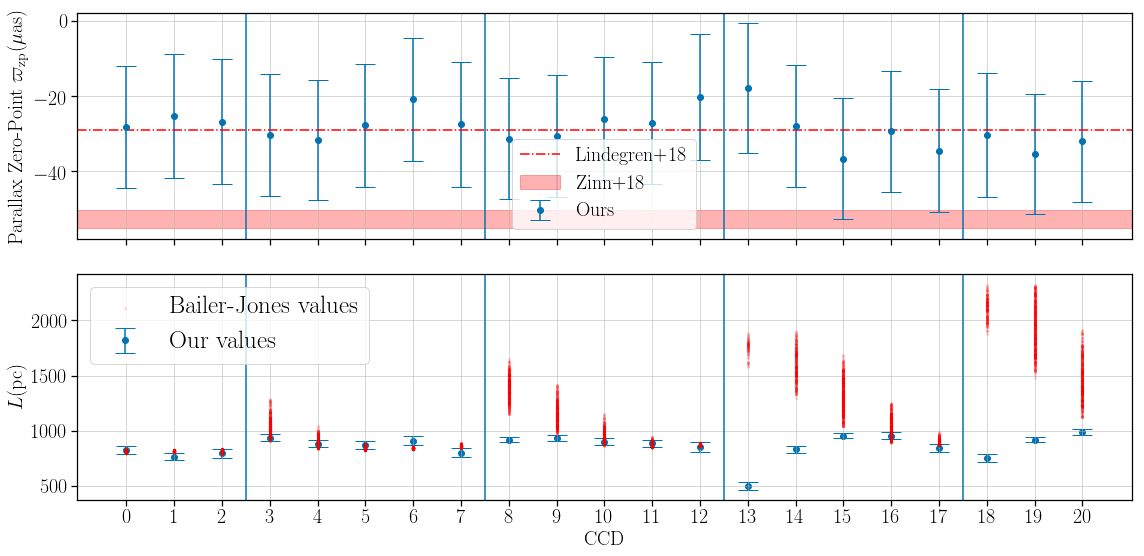

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,16),sharex=True, sharey=True)
c1 = ax1.scatter(df.ra, df.dec, c = df.ccd, cmap='tab20')
c2 = ax2.scatter(df.ra, df.dec, c = df.oo_zp, cmap='viridis')
c3 = ax3.scatter(df.ra, df.dec, c = df.L, vmin=df.r_length_prior.min(), vmax = df.r_length_prior.max())
c4 = ax4.scatter(df.ra, df.dec, c = df.r_length_prior,vmin=df.r_length_prior.min(), vmax = df.r_length_prior.max())

fig.colorbar(c1,ax=ax1,label='CCD')
fig.colorbar(c2, ax=ax2, label=r'$\varpi_{\rm zp} (\mu \rm as)$')
fig.colorbar(c3, ax=ax3, label=r'$L (\rm pc)$ (Ours)', extend='both')
fig.colorbar(c4, ax=ax4, label=r'$L (\rm pc)$ (Bailer-Jones)', extend='both')

ax3.set_xlabel('RA')
ax4.set_xlabel('RA')
ax1.set_ylabel('Dec')
ax3.set_ylabel('Dec')
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,8), sharex=True)
(_, caps1,_) = ax1.errorbar(gr.ccdlabel.astype(int).values, gr.oo_zp, yerr=gr.oo_zp_std, fmt='o', capsize=10, label='Ours')
ax1.axhline(-29., c='r', linestyle='-.', label='Lindegren+18')
ax1.axhspan(-52.8-2.4, -52.8+2.4, alpha=.3, color='r', label='Zinn+18')
ax1.axvline(2.5)
ax1.axvline(7.5)
ax1.axvline(12.5)
ax1.axvline(17.5)
ax1.legend(fontsize=20)


(_, caps2,_) = ax2.errorbar(gr.ccdlabel.astype(int).values, gr.L, yerr=gr.L_std, fmt='o', capsize=10, label='Our values', zorder=1)
for cap1, cap2 in zip(caps1, caps2):
    cap1.set_markeredgewidth(1)
    cap2.set_markeredgewidth(1)
ax2.scatter(df.ccd.values, df.r_length_prior, s=5,c='r', alpha=.1, label='Bailer-Jones values', zorder=2)
ax2.axvline(2.5)
ax2.axvline(7.5)
ax2.axvline(12.5)
ax2.axvline(17.5)

ax2.set_xticks(gr.ccdlabel.astype(int).values)
ax2.set_xlabel(r'CCD #')
ax1.set_ylabel(r'Parallax Zero-Point $\varpi_{\rm zp} (\mu \rm as)$')
ax2.set_ylabel(r'$L (\rm pc)$')
ax2.legend(fontsize=25)

ax1.grid(alpha=.5)
ax2.grid(alpha=.5)
plt.tight_layout()
plt.show()

In [21]:
print(np.mean(gr.oo_zp.values))

-28.393118871589937


In [24]:
print(np.mean(gr.oo_zp_std.values)/np.sqrt(len(gr)))

3.574135575941167
